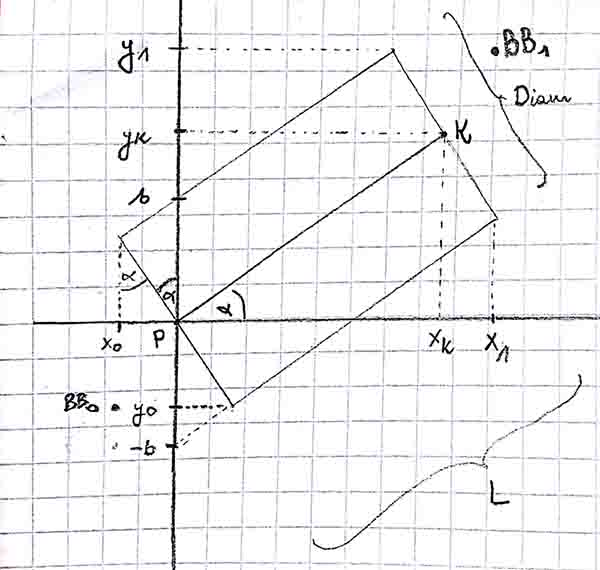

In [38]:
from IPython.display import Image
Image(filename='skewed_pipe_2d_fig_small.jpg', width=600)

Prosta PK przechodzaca przez srodek rury i punkt (0,0):<br>
`y = tg(alpha) * x`

Proste równoległe do PK tworzące rurę:<br>
`y = tg(alpha) * x + b`<br>
`y = tg(alpha) * x - b`

Prosta prostopadła do PK przechodząca przez P:<br>
`y = -1./tg(alpha) * x`

Ostatnia prosta:<br>
`y = -1/tg(alpha) * (x-xk) + yk`

In [46]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate

In [47]:
alpha = math.pi/6      # kat (0; pi/4>
Diam = 100             # srednica rury
L = 1024               # dlugosc rury
L_in = 300             # dlugosc rury wejsciowej
L_out = L_in           # dlugosc rury wyjsciowej
spline_width = 200     # dlugosc x-owej wspolrzednej ukosnej czesci rurki

In [48]:
assert 0 < alpha <= math.pi/4.
assert L > 0
assert Diam > 0
assert spline_width <= L*math.cos(alpha)

In [49]:
P = (0., 0.)
K = (L*math.cos(alpha),  L*math.sin(alpha))
b = Diam/(2*math.cos(alpha))
x0 = -Diam*math.sin(alpha)/2.
y0 = -Diam*math.cos(alpha)/2.
y1 = K[1]-y0
x1 = K[0]-x0
BB_0 = (-L_in, -Diam/2.)
BB_1 = (K[0]+L_out, K[1]+Diam/2.)

# wielkość Boundary Boxa
nx = int(math.ceil(BB_1[0]))-int(math.floor(BB_0[0]))+2
ny = int(math.ceil(BB_1[1]))-int(math.floor(BB_0[1]))+2
print nx, ny

x = np.linspace(BB_0[0], BB_1[0],nx)
y = np.linspace(BB_0[1], BB_1[1],ny)
X, Y = np.meshgrid(x,y)

1489 614


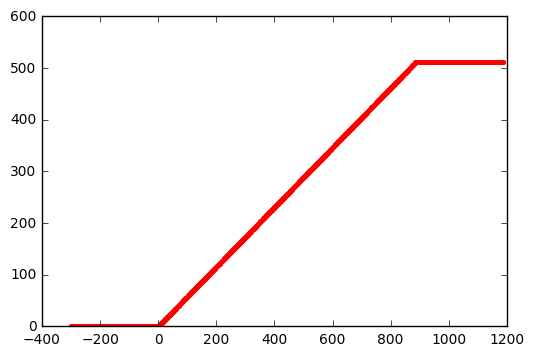

In [71]:
xs = np.arange(BB_0[0],BB_1[0])

ys = math.tan(alpha)*xs
ys[xs<0]=0
ys[xs>K[0]]=K[1]

##########################
plt.plot(xs, ys, 'r.');

In [60]:
-spline_width/math.cos(alpha)

-230.9401076758503

In [57]:
p1_x = xs[xs<-spline_width/math.cos(alpha)]
p1_y = ys[xs<-spline_width/math.cos(alpha)]
print(len(p1_x))

p2_x = xs[(xs>spline_width) & (xs<K[0]-spline_width/math.cos(alpha))]
p2_y = ys[(xs>spline_width) & (xs<K[0]-spline_width/math.cos(alpha))]

p3_x = xs[xs>K[0]+spline_width]
p3_y = ys[xs>K[0]+spline_width]
print(len(p3_x))

px = np.concatenate((p1_x,p2_x,p3_x))
py = np.concatenate((p1_y,p2_y,p3_y))

##########################
plt.plot(xs, ys, 'b.')
plt.plot(px, py, 'r.')
plt.axis('equal')

70
100


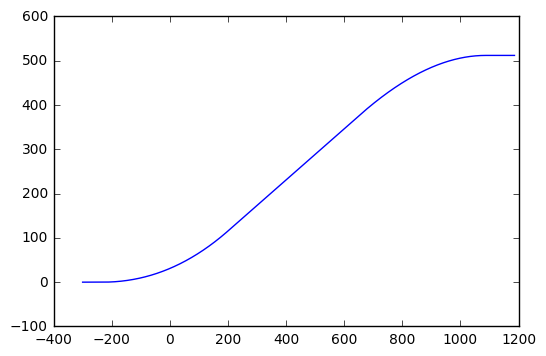

In [59]:
tck = interpolate.splrep(px,py,s=0)      # spline representation (vector of knots, the B-spline coefficients, the degree of the spline)
xnew = np.arange(BB_0[0],BB_1[0])
ynew = interpolate.splev(xnew,tck,der=0) # Given the tck, evaluate the value of the smoothing polynomial and its derivatives.

##########################
plt.plot(xnew, ynew)

In [61]:
D = np.zeros((ny,nx),dtype=np.int)
for x,y in zip(xnew, ynew):
    # zaznaczanie przez okrag dookola punktu
    D[ (X-x)**2 + (Y-y)**2 < (Diam/2.)**2 ]=1

((-24.999999999999996, 911.8100134752652), (-43.30127018922194, 555.3012701892219))


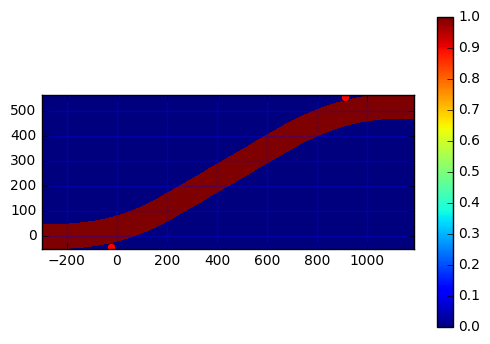

In [68]:
print((x0, x1), (y0, y1))
plt.plot((x0, x1), (y0, y1), 'ro')
plt.imshow(D,origin='lower',interpolation='nearest', extent=(BB_0[0], BB_1[0], BB_0[1], BB_1[1]))
# plt.axis('equal')
plt.grid(color='b', linestyle='-', linewidth=1, alpha = 0.3)
plt.colorbar()

In [37]:
path = "/DATA/shared/"
filename = 'spline_pipe_2d_geometry'

np.savez(filename,geo=D, alpha=alpha, D=Diam, L=L)
g = np.load(filename + '.npz')
print g['alpha']

0.523598775598
